In [22]:
import librosa
import numpy as np

# 오디오 파일 로드
y, sr = librosa.load('./output.wav', sr=None)


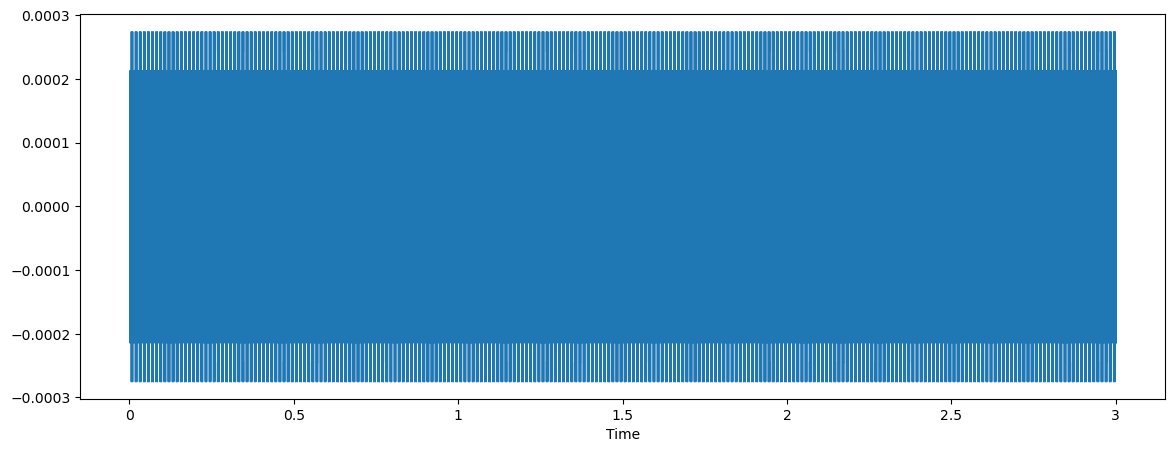

In [23]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [24]:

# 푸리에 변환
D = librosa.stft(y)

# 복소 스펙트로그램 값에서 절대값을 취해 실수 스펙트로그램을 얻음
D_abs = np.abs(D)

# 스펙트로그램을 로그 스케일로 변환
D_db = librosa.amplitude_to_db(D_abs, ref=np.max)

In [27]:
D.shape

(1025, 259)

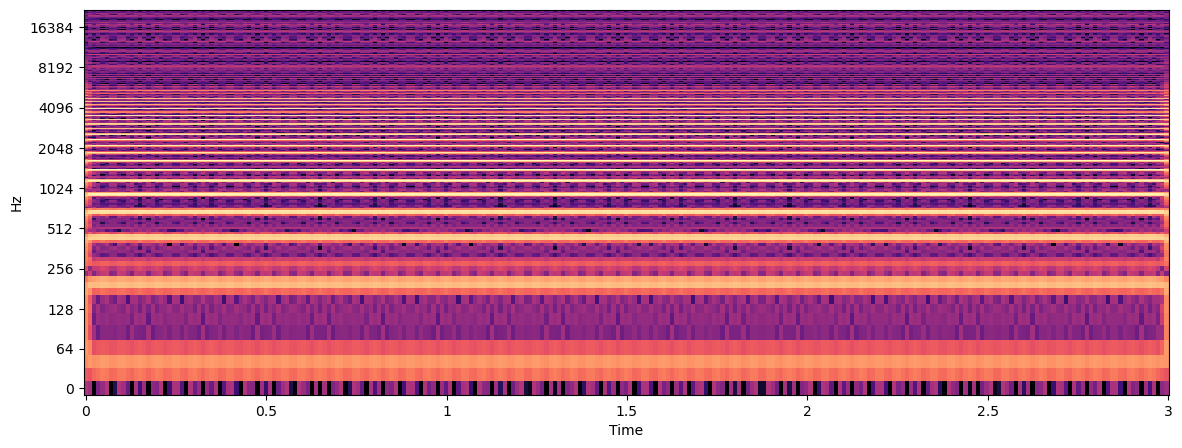

In [26]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')

In [29]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

print(mfcc.shape)

(13, 259)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 특성 데이터와 레이블 데이터를 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델로 테스트 데이터 예측
y_pred = model.predict(X_test)

# 예측 결과의 정확도 출력
print('Accuracy:', accuracy_score(y_test, y_pred))

NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import classification_report

# 학습된 모델로 테스트 데이터 예측
y_pred = model.predict(X_test)

# 예측 결과와 실제 값 비교를 통한 성능 평가
print(classification_report(y_test, y_pred))
